In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import zarr

In [2]:
from dask.distributed import Client

client = Client()
client

/usr/local/python/anaconda3/envs/pangeo3.7/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:45745 Dashboard: http://127.0.0.1:44341/status,Cluster Workers: 8 Cores: 40 Memory: 134.90 GB


In [3]:
%%time
zarrdir = 'zarr-test-consolidated/'
zdir = zarrdir+'CNRM-CERFACS.CNRM-CM6-1.historical.3hr.gr'
dss = xr.open_zarr(zdir)

CPU times: user 137 ms, sys: 32.8 ms, total: 170 ms
Wall time: 737 ms


In [4]:
ds = dss.sel(time=slice('1950-01-01', '2014-12-31'))

CPU times: user 1min 30s, sys: 12.7 s, total: 1min 43s
Wall time: 11min 3s


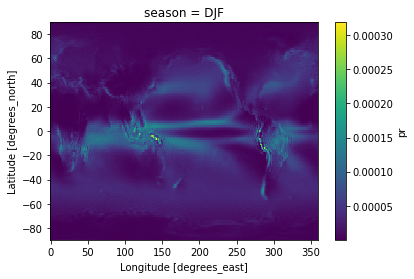

In [5]:
%%time 
ds.pr.mean('member_id').groupby('time.season').mean('time')[0].plot()